<a href="https://colab.research.google.com/github/JonamManoj/cf969-bigdata-1/blob/main/bigDataAssignment_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Data generation based on the provided initial code
n = 10
# replace dig1 with the second-to-last digit of your registration number
# replace dig2 with the last digit of your registration number
dig1 = 5
dig2 = 1
dummyrepetitions = 10 * dig1 + dig2
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i - j) / (abs(i - j) + 1)

ssigma = np.array([[0] * 1 for _ in range(n)], dtype=float)
# mmu is the vector μ in the assignment
mmu = np.array([[0] * 1 for _ in range(n)], dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

ddiag = np.array([[0] * n for _ in range(n)], dtype=float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
# C is the matrix C in the assignment
C = 0.5 * (C2 + C2.T)
mu = mmu.flatten()

In [2]:
# Define the optimization and constraint functions
def portfolio_variance(x, C):
    return x @ C @ x

def constraint_eq(x):
    return np.sum(x) - 1

def constraint_leq(x):
    return 1 - np.sum(x)

def constraint_ineq(x, mu, r):
    return mu @ x - r

def solve_task(mu, C, r_values, bounds, constraints):
    sigma_x = []
    mu_x = []

    for r in r_values:
        x0 = np.ones(len(mu)) / len(mu)  # initial guess

        result = minimize(portfolio_variance, x0, args=(C,), bounds=bounds, constraints=constraints(r))

        if result.success:
            x = result.x
            sigma_x.append(np.sqrt(x @ C @ x))
            mu_x.append(mu @ x)
        else:
            sigma_x.append(np.nan)
            mu_x.append(np.nan)

    return sigma_x, mu_x

r_values = np.linspace(2.00, 9.00, 29)


In [3]:
# Task 1: Original Markowitz Model
bounds_task1 = [(0, None) for _ in range(n)]
constraints_task1 = lambda r: [{'type': 'eq', 'fun': constraint_eq},
                               {'type': 'eq', 'fun': constraint_ineq, 'args': (mu, r)}]

sigma_x_task1, mu_x_task1 = solve_task(mu, C, r_values, bounds_task1, constraints_task1)


In [4]:
# Task 2: Partial Investment Allowed
bounds_task2 = [(0, None) for _ in range(n)]
constraints_task2 = lambda r: [{'type': 'ineq', 'fun': constraint_leq},
                               {'type': 'eq', 'fun': constraint_ineq, 'args': (mu, r)}]

sigma_x_task2, mu_x_task2 = solve_task(mu, C, r_values, bounds_task2, constraints_task2)

In [5]:
# Task 3: μ^T x ≥ r
bounds_task3 = [(0, None) for _ in range(n)]
constraints_task3 = lambda r: [{'type': 'eq', 'fun': constraint_eq},
                               {'type': 'ineq', 'fun': constraint_ineq, 'args': (mu, r)}]

sigma_x_task3, mu_x_task3 = solve_task(mu, C, r_values, bounds_task3, constraints_task3)

In [6]:
# Task 4: Short Selling Allowed
bounds_task4 = [(None, None) for _ in range(n)]
constraints_task4 = lambda r: [{'type': 'eq', 'fun': constraint_eq},
                               {'type': 'eq', 'fun': constraint_ineq, 'args': (mu, r)}]

sigma_x_task4, mu_x_task4 = solve_task(mu, C, r_values, bounds_task4, constraints_task4)

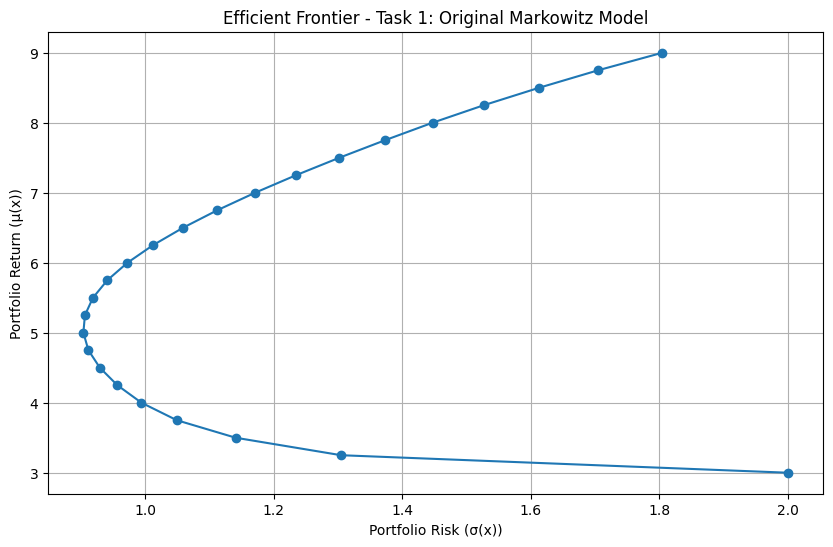

In [7]:
# Plotting results for Task 1
plt.figure(figsize=(10, 6))
plt.plot(sigma_x_task1, mu_x_task1, 'o-')
plt.xlabel('Portfolio Risk (σ(x))')
plt.ylabel('Portfolio Return (μ(x))')
plt.title('Efficient Frontier - Task 1: Original Markowitz Model')
plt.grid(True)
plt.show()

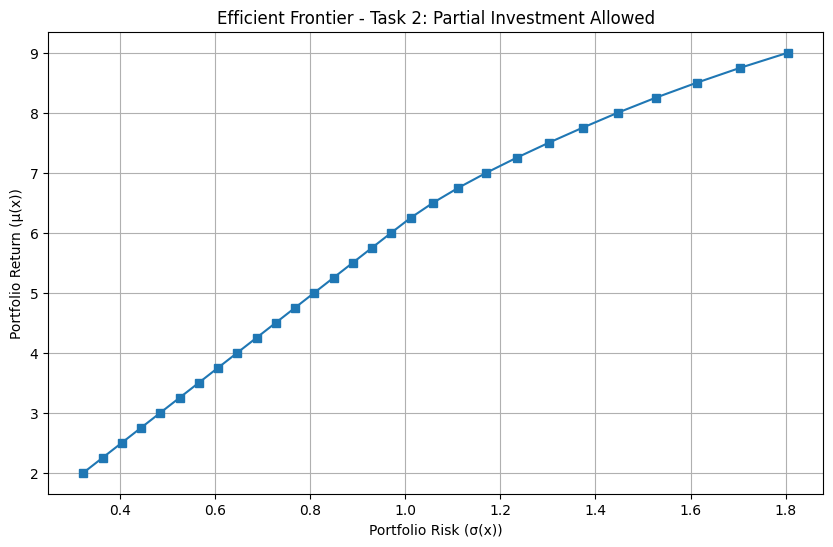

In [8]:
# Plotting results for Task 2
plt.figure(figsize=(10, 6))
plt.plot(sigma_x_task2, mu_x_task2, 's-')
plt.xlabel('Portfolio Risk (σ(x))')
plt.ylabel('Portfolio Return (μ(x))')
plt.title('Efficient Frontier - Task 2: Partial Investment Allowed')
plt.grid(True)
plt.show()

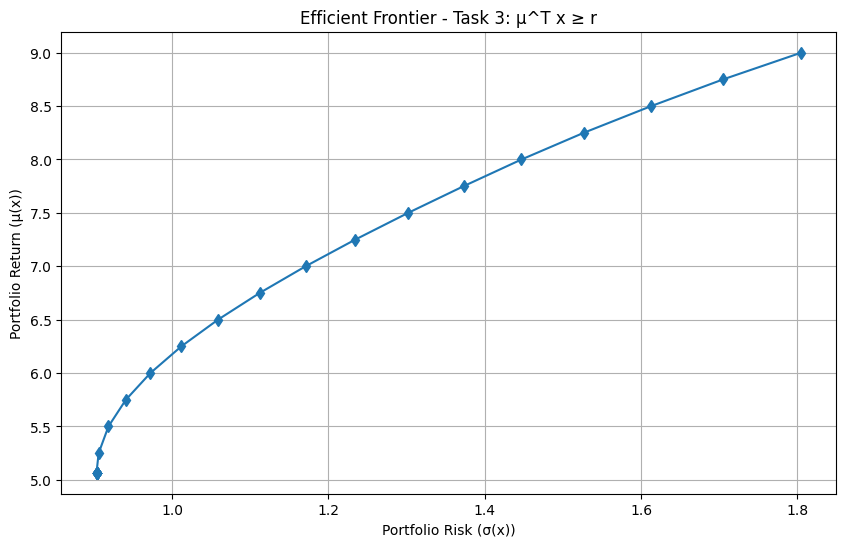

In [9]:
# Plotting results for Task 3
plt.figure(figsize=(10, 6))
plt.plot(sigma_x_task3, mu_x_task3, 'd-')
plt.xlabel('Portfolio Risk (σ(x))')
plt.ylabel('Portfolio Return (μ(x))')
plt.title('Efficient Frontier - Task 3: μ^T x ≥ r')
plt.grid(True)
plt.show()

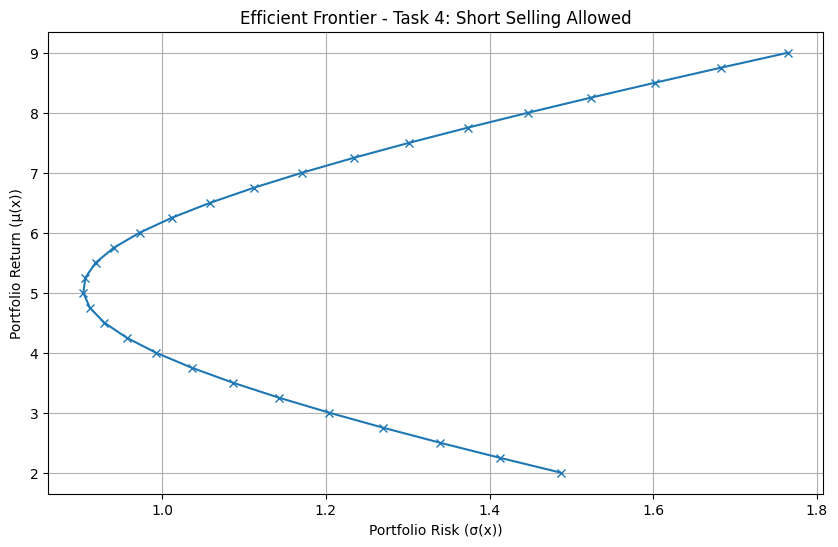

In [10]:
# Plotting results for Task 4
plt.figure(figsize=(10, 6))
plt.plot(sigma_x_task4, mu_x_task4, 'x-')
plt.xlabel('Portfolio Risk (σ(x))')
plt.ylabel('Portfolio Return (μ(x))')
plt.title('Efficient Frontier - Task 4: Short Selling Allowed')
plt.grid(True)
plt.show()

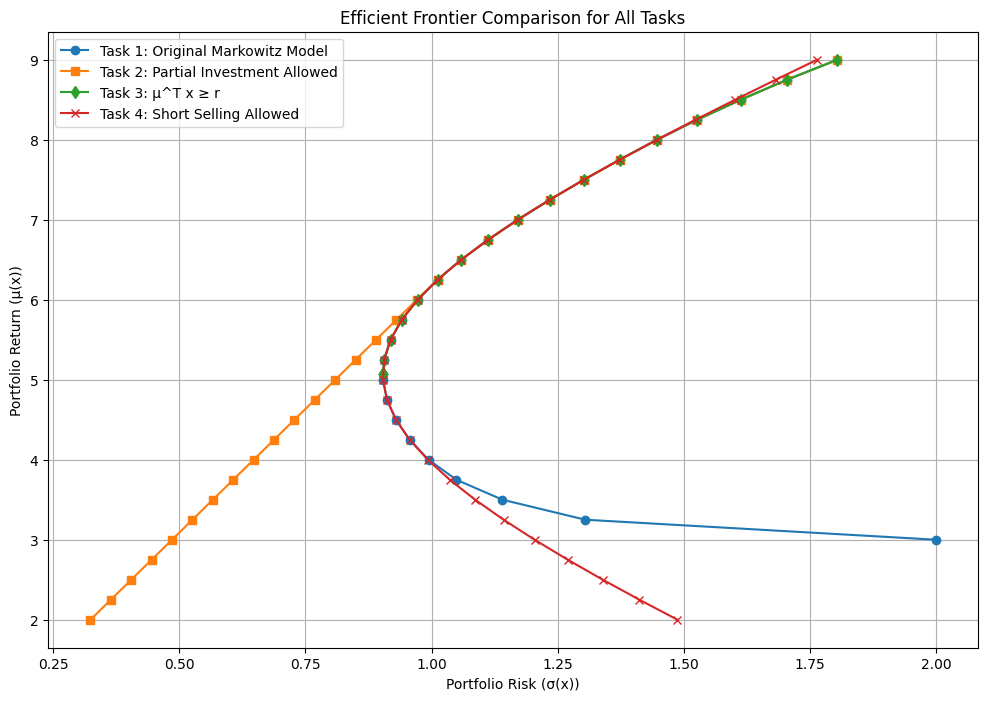

In [11]:
# Combined Comparison Plot
plt.figure(figsize=(12, 8))
plt.plot(sigma_x_task1, mu_x_task1, 'o-', label='Task 1: Original Markowitz Model')
plt.plot(sigma_x_task2, mu_x_task2, 's-', label='Task 2: Partial Investment Allowed')
plt.plot(sigma_x_task3, mu_x_task3, 'd-', label='Task 3: μ^T x ≥ r')
plt.plot(sigma_x_task4, mu_x_task4, 'x-', label='Task 4: Short Selling Allowed')
plt.xlabel('Portfolio Risk (σ(x))')
plt.ylabel('Portfolio Return (μ(x))')
plt.title('Efficient Frontier Comparison for All Tasks')
plt.legend()
plt.grid(True)
plt.show()